# Testing Space

In [1]:
from oggm import DEFAULT_BASE_URL, graphics, workflow

import dtcg.interface.gateway as interface_gateway
import dtcg.interface.widgets as dtcg_widgets

# DEFAULT_BASE_URL = "https://cluster.klima.uni-bremen.de/~oggm/demo_gdirs"

For forward compatibility, a user interacts with DTCG only through API requests. This means a single centralised framework can handle requests from Jupyter notebooks, websites, and cli wrappers. A user cannot directly execute backend code.

## User flow 01

>**I'm a student, and I want to select only Alpine glaciers so I can view them on a map.**

The user interacts with a frontend, which generates an API query. The user cannot interact directly with DTCG/OGGM, nor execute code.
API generation is platform-agnostic. The user can generate a query using a GUI:

In [2]:
print("Try me!")
dtcg_select_region = dtcg_widgets.WidgetSelectSubRegion()
gui_query = dtcg_select_region.get_output()

Try me!


Output(layout=Layout(align_items='stretch', border_bottom='1px solid black', border_left='1px solid black', bo…

Or via the command line:

In [3]:
# A query will look like this
user_query_params = {
    "query": "select_subregion",
    "subregion_name": "Alps",
    "oggm_params": {
        "use_multiprocessing": True,
        "rgi_version": "62",
    },
}
user_query = interface_gateway.RequestAPIConstructor(**user_query_params)
user_query.get_query()

{'query': 'select_subregion',
 'region_name': None,
 'subregion_name': 'Alps',
 'shapefile_path': None,
 'oggm_params': {'use_multiprocessing': True, 'rgi_version': '62'}}

**Note:** Until the internal API is fully implemented, demo requests are handled directly via the ``gateway`` module:

In [4]:
# Use static API query
request = interface_gateway._set_user_query(**user_query.get_query())
response = interface_gateway.get_query_response(query=request);

2025-01-22 15:48:32: oggm.cfg: Reading default parameters from the OGGM `params.cfg` configuration file.
2025-01-22 15:48:32: oggm.cfg: Multiprocessing switched OFF according to the parameter file.
2025-01-22 15:48:32: oggm.cfg: Multiprocessing: using all available processors (N=22)
2025-01-22 15:48:33: oggm.cfg: Multiprocessing switched ON after user settings.


Let's check the GUI selection was successful:

In [5]:
assert (response["data"]["O1Region"] == "11").all()
assert (response["data"]["O2Region"] == "1").all()

2025-01-22 15:48:39: oggm.workflow: init_glacier_directories from prepro level 4 on 3892 glaciers.
2025-01-22 15:48:39: oggm.workflow: Execute entity tasks [gdir_from_prepro] on 3892 glaciers


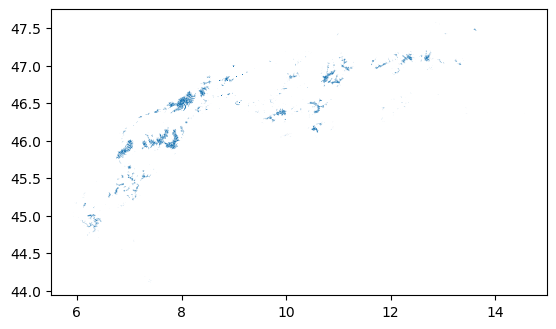

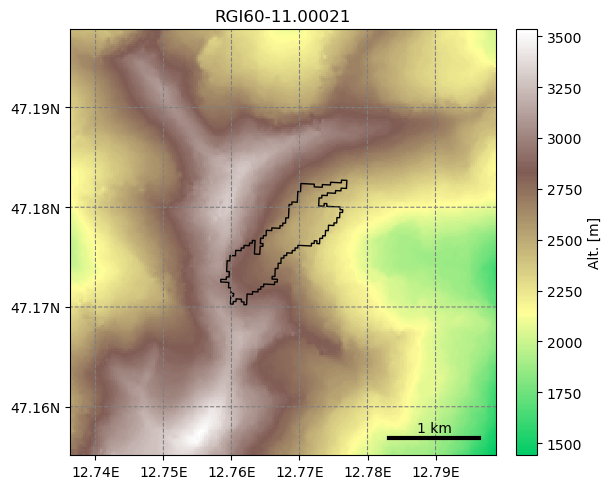

In [6]:
response["data"].plot()
gdirs = workflow.init_glacier_directories(
    response["data"],
    prepro_border=80,
    prepro_base_url=DEFAULT_BASE_URL,
    from_prepro_level=4,
)
graphics.plot_domain(gdirs[20], figsize=(6, 5));